# Football Player Detection and Segmentation
Mohammad Javad Maheronnaghsh

## Literature Review
There are lots of models for player detection and segmentation in football (soccer), which I have checked on google scholar, Kaggle, and GitHub.

Here I have implemented 3 different approached to analyse the football players' data. I will discuss the results in each part. Any source that is used will be discussed and referred.

Dataset: https://www.kaggle.com/datasets/ihelon/football-player-segmentation/code

## Project 1: ultralytics Tool
It is a tool as discussed in [this link](https://github.com/ultralytics/ultralytics). I am going to analyse the results, discuss this tool more, and discover the potential limitations, pros and cons of this project here.
My separate code is here: https://www.kaggle.com/code/mjmaher987/football-player-detection/edit

### Install the Requirements

In [1]:
!rm -rf runs
!pip install ultralytics &> /dev/null
from ultralytics import YOLO
import os
import cv2
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from IPython.display import HTML, Video, Image, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')

### Data Gathering

In [2]:
!mkdir -p /kaggle/working/frame
img_path='/kaggle/input/football-player-segmentation/images'
destination = "frame" 
if not os.path.exists(destination):
    os.makedirs(destination)

files=os.listdir(img_path)

for filename in files[0:2]:
    src_path = os.path.join(img_path, filename) 
    if filename.endswith(".jpg"):
        dst_path = os.path.join(destination, filename) 
        shutil.copyfile(src_path, dst_path)
        
!ls frame      
path_frame='./frame'
path_fig='./fig'

208.jpg  473.jpg


### Model Definition (Yolo-v8)
Here we define the model whihc is Yolo version 8 and also explore the data.

In [3]:
model = YOLO("yolov8x.pt") 
!yolo task=detect mode=predict model=yolov8x.pt conf=0.7 source={path_frame} save=True
path_run='./runs/detect/predict'
paths0=[]
for dirname, _, filenames in os.walk(path_run):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths0+=[(os.path.join(dirname, filename))]
paths0=sorted(paths0)            
images0=[]
for i in tqdm(range(len(paths0))):
    images0+=[cv2.imread(paths0[i])]
def create_animation(ims):
    fig=plt.figure(figsize=(12,8))
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    text = plt.text(0.05, 0.05, f'Slide {0}', transform=fig.transFigure, fontsize=14, color='blue')
    plt.axis('off')
    plt.close()

    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        text.set_text(f'Slide {i}')        
        return [im]    
    
    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

create_animation(np.array(images0))

100%|██████████| 131M/131M [00:00<00:00, 326MB/s] 


Ultralytics YOLOv8.1.9 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

image 1/2 /kaggle/working/frame/208.jpg: 384x640 11 persons, 2 cars, 69.3ms
image 2/2 /kaggle/working/frame/473.jpg: 384x640 14 persons, 27.1ms
Speed: 5.9ms preprocess, 48.2ms inference, 237.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


100%|██████████| 2/2 [00:00<00:00, 31.68it/s]


### Data Analysis
Here we delve into the model and the definitions more, and specially, talk more about the rectangles which detect the players for us.

#### Players

In [4]:
results = model.predict(path_frame,conf=0.7)
print(len(results))

print('1--')
BOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data.cpu().numpy()).astype(float)
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','confidence','class','i']
display(BOX)

print('2--')
class_map = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}

print('3--')
BOX['class']=BOX['class'].apply(lambda x: class_map[int(x)+1])
BOX=BOX.reset_index(drop=True)
display(BOX)
display(BOX['class'].value_counts())

print('4--')
data0 = BOX.query("`class` == 'person' and `confidence` > 0.7")
data0['i']=data0['i'].apply(lambda x: int(x))
data0['path']=data0['i'].apply(lambda x:os.path.join('./frame',files[x]))
data0=data0.reset_index(drop=True)
data0['j']=data0.index.tolist()
display(data0)
print('5')


image 1/2 /kaggle/working/frame/208.jpg: 384x640 11 persons, 2 cars, 88.6ms
image 2/2 /kaggle/working/frame/473.jpg: 384x640 14 persons, 27.1ms
Speed: 3.4ms preprocess, 57.9ms inference, 181.5ms postprocess per image at shape (1, 3, 384, 640)
2
1--


/tmp/ipykernel_34/1542689662.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  BOX=pd.concat([BOX,arri],axis=0)


x           y           x2          y2  confidence  class    i
0    665.346069  258.979462   794.696899  310.506348    0.905391    2.0  0.0
1   1150.543579  689.610718  1222.981201  843.961487    0.881516    0.0  0.0
2   1360.206055  491.760559  1414.813477  622.687927    0.876934    0.0  0.0
3   1482.260986  245.478760  1610.051025  293.075470    0.875818    2.0  0.0
4   1553.824585  600.252502  1604.833374  745.739319    0.863751    0.0  0.0
5    229.939774  370.778961   291.249023  500.218414    0.860526    0.0  0.0
6   1098.475830  357.658539  1160.755127  474.043304    0.858318    0.0  0.0
7   1149.967041  262.070160  1209.866699  365.823486    0.851419    0.0  0.0
8    369.209534  404.105591   413.000519  531.923645    0.850045    0.0  0.0
9    732.496094  295.737427   782.439697  401.166565    0.846423    0.0  0.0
10  1267.099854  319.531891  1304.214355  424.856323    0.840007    0.0  0.0
11   496.693451  528.003906   531.223877  662.866943    0.820136    0.0  0.0
12   914.549316  244.738403   967.193237  345.201416    0.815810    0.0  0.0
0    732.597839  380.752258   796.301880  484.681732    0.887527    0.0  1.0
1    322.264435  307.528656   377.577820  417.094299    0.884413    0.0  1.0
2   1048.421875  323.444672  1109.620361  417.947388    0.873929    0.0  1.0
3    683.774170  196.997086   735.004761  290.239563    0.873739    0.0  1.0
4   1139.812744  338.410889  1189.926636  437.106354    0.871814    0.0  1.0
5   1366.035645  346.012573  1442.657227  435.935852    0.867275    0.0  1.0
6     24.170889  508.676605    83.227486  641.117310    0.861408    0.0  1.0
7    134.564087  280.325928   190.228882  379.855103    0.856701    0.0  1.0
8   1457.894409  271.475525  1497.230225  371.421448    0.853468    0.0  1.0
9   1748.821533  476.725525  1804.574463  598.872070    0.847459    0.0  1.0
10  1628.482544  366.752625  1667.713989  480.288696    0.846491    0.0  1.0
11   825.043396  171.030487   876.437988  260.233887    0.845944    0.0  1.0
12  1385.297974  225.927475  1418.700439  318.839233    0.815938    0.0  1.0
13  1890.633301  752.478882  1919.301514  902.520630    0.773944    0.0  1.0

2--
3--


x           y           x2          y2  confidence   class    i
0    665.346069  258.979462   794.696899  310.506348    0.905391     car  0.0
1   1150.543579  689.610718  1222.981201  843.961487    0.881516  person  0.0
2   1360.206055  491.760559  1414.813477  622.687927    0.876934  person  0.0
3   1482.260986  245.478760  1610.051025  293.075470    0.875818     car  0.0
4   1553.824585  600.252502  1604.833374  745.739319    0.863751  person  0.0
5    229.939774  370.778961   291.249023  500.218414    0.860526  person  0.0
6   1098.475830  357.658539  1160.755127  474.043304    0.858318  person  0.0
7   1149.967041  262.070160  1209.866699  365.823486    0.851419  person  0.0
8    369.209534  404.105591   413.000519  531.923645    0.850045  person  0.0
9    732.496094  295.737427   782.439697  401.166565    0.846423  person  0.0
10  1267.099854  319.531891  1304.214355  424.856323    0.840007  person  0.0
11   496.693451  528.003906   531.223877  662.866943    0.820136  person  0.0
12   914.549316  244.738403   967.193237  345.201416    0.815810  person  0.0
13   732.597839  380.752258   796.301880  484.681732    0.887527  person  1.0
14   322.264435  307.528656   377.577820  417.094299    0.884413  person  1.0
15  1048.421875  323.444672  1109.620361  417.947388    0.873929  person  1.0
16   683.774170  196.997086   735.004761  290.239563    0.873739  person  1.0
17  1139.812744  338.410889  1189.926636  437.106354    0.871814  person  1.0
18  1366.035645  346.012573  1442.657227  435.935852    0.867275  person  1.0
19    24.170889  508.676605    83.227486  641.117310    0.861408  person  1.0
20   134.564087  280.325928   190.228882  379.855103    0.856701  person  1.0
21  1457.894409  271.475525  1497.230225  371.421448    0.853468  person  1.0
22  1748.821533  476.725525  1804.574463  598.872070    0.847459  person  1.0
23  1628.482544  366.752625  1667.713989  480.288696    0.846491  person  1.0
24   825.043396  171.030487   876.437988  260.233887    0.845944  person  1.0
25  1385.297974  225.927475  1418.700439  318.839233    0.815938  person  1.0
26  1890.633301  752.478882  1919.301514  902.520630    0.773944  person  1.0

class
person    25
car        2
Name: count, dtype: int64

4--


/tmp/ipykernel_34/1542689662.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['i']=data0['i'].apply(lambda x: int(x))
/tmp/ipykernel_34/1542689662.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['path']=data0['i'].apply(lambda x:os.path.join('./frame',files[x]))


x           y           x2          y2  confidence   class  i  \
0   1150.543579  689.610718  1222.981201  843.961487    0.881516  person  0   
1   1360.206055  491.760559  1414.813477  622.687927    0.876934  person  0   
2   1553.824585  600.252502  1604.833374  745.739319    0.863751  person  0   
3    229.939774  370.778961   291.249023  500.218414    0.860526  person  0   
4   1098.475830  357.658539  1160.755127  474.043304    0.858318  person  0   
5   1149.967041  262.070160  1209.866699  365.823486    0.851419  person  0   
6    369.209534  404.105591   413.000519  531.923645    0.850045  person  0   
7    732.496094  295.737427   782.439697  401.166565    0.846423  person  0   
8   1267.099854  319.531891  1304.214355  424.856323    0.840007  person  0   
9    496.693451  528.003906   531.223877  662.866943    0.820136  person  0   
10   914.549316  244.738403   967.193237  345.201416    0.815810  person  0   
11   732.597839  380.752258   796.301880  484.681732    0.887527  person  1   
12   322.264435  307.528656   377.577820  417.094299    0.884413  person  1   
13  1048.421875  323.444672  1109.620361  417.947388    0.873929  person  1   
14   683.774170  196.997086   735.004761  290.239563    0.873739  person  1   
15  1139.812744  338.410889  1189.926636  437.106354    0.871814  person  1   
16  1366.035645  346.012573  1442.657227  435.935852    0.867275  person  1   
17    24.170889  508.676605    83.227486  641.117310    0.861408  person  1   
18   134.564087  280.325928   190.228882  379.855103    0.856701  person  1   
19  1457.894409  271.475525  1497.230225  371.421448    0.853468  person  1   
20  1748.821533  476.725525  1804.574463  598.872070    0.847459  person  1   
21  1628.482544  366.752625  1667.713989  480.288696    0.846491  person  1   
22   825.043396  171.030487   876.437988  260.233887    0.845944  person  1   
23  1385.297974  225.927475  1418.700439  318.839233    0.815938  person  1   
24  1890.633301  752.478882  1919.301514  902.520630    0.773944  person  1   

               path   j  
0   ./frame/208.jpg   0  
1   ./frame/208.jpg   1  
2   ./frame/208.jpg   2  
3   ./frame/208.jpg   3  
4   ./frame/208.jpg   4  
5   ./frame/208.jpg   5  
6   ./frame/208.jpg   6  
7   ./frame/208.jpg   7  
8   ./frame/208.jpg   8  
9   ./frame/208.jpg   9  
10  ./frame/208.jpg  10  
11  ./frame/473.jpg  11  
12  ./frame/473.jpg  12  
13  ./frame/473.jpg  13  
14  ./frame/473.jpg  14  
15  ./frame/473.jpg  15  
16  ./frame/473.jpg  16  
17  ./frame/473.jpg  17  
18  ./frame/473.jpg  18  
19  ./frame/473.jpg  19  
20  ./frame/473.jpg  20  
21  ./frame/473.jpg  21  
22  ./frame/473.jpg  22  
23  ./frame/473.jpg  23  
24  ./frame/473.jpg  24

5


در تصاویر بالا، جداولی را میبینید که خروجی ها را به همراه درجه اطمینان نشان داده شده است.
همچنین هر تشخیص یا همان دیتکشن به کمک دو نقطه در صفحه دو بعدی انجام میشود.
یکی از نقاط بالا سمت چپ و دیگری پایین سمت راست را مشخص میکند

همچنین کلاس (دسته) این تصویر که آیا انسان است یا خودرو یا ... مشخص میکند چراکه یولو قابلیت شناسایی اشیا مختلف را دارد.

#### Rectangles

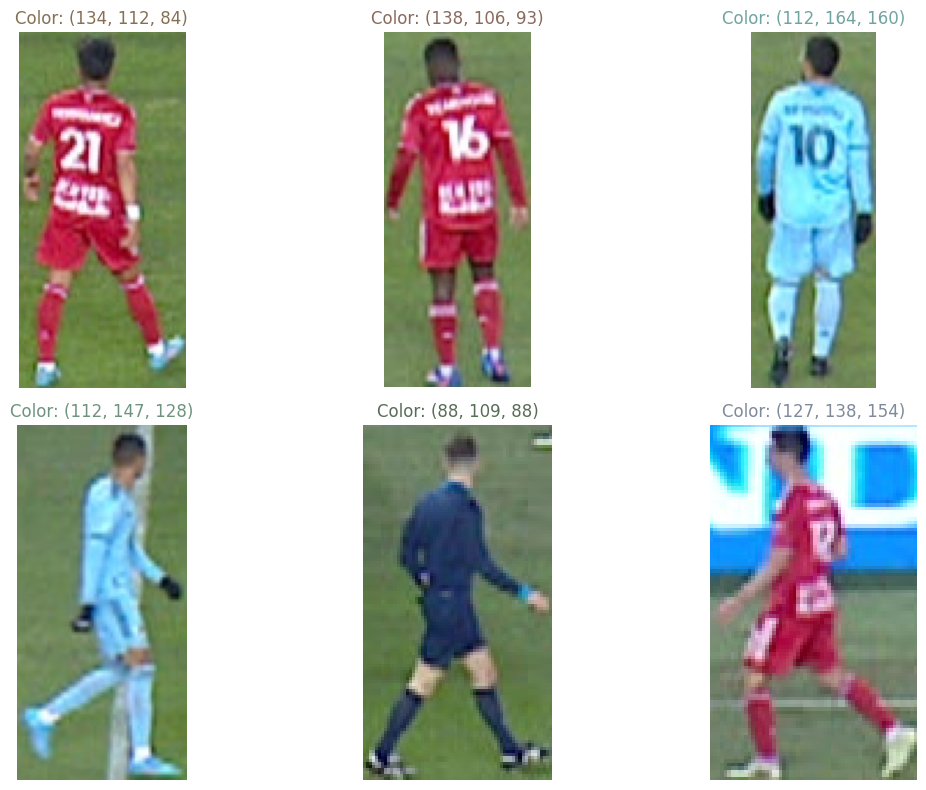

In [5]:
num_images = 6
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i in range(num_images):
    path = data0.iloc[i, 7]
    x = int(data0.iloc[i, 0])
    y = int(data0.iloc[i, 1])
    x2 = int(data0.iloc[i, 2])
    y2 = int(data0.iloc[i, 3])
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = img[y:y2, x:x2, :]
    
    color = tuple(np.mean(img2, axis=(0, 1)).astype(int))
    data0.loc[i, 'color'] = str(color)
    
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    ax.imshow(img2)
    ax.set_title(f'Color: {color}', color=(color[0]/255, color[1]/255, color[2]/255))
    ax.axis('off')

# Hide empty parts
for i in range(num_images, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()


#### Grass Mask

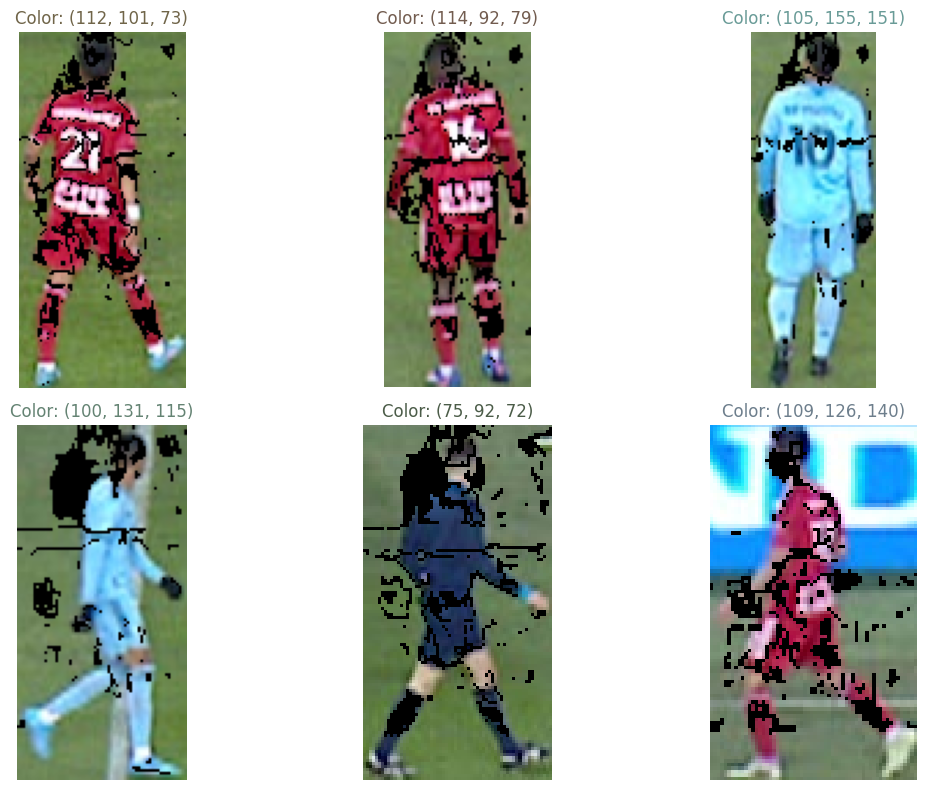

In [6]:
num_images = 6

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

#`bgimg` is background image
bgimg = img[y-100:y2-100, x-100:x2-100, :]

for i in range(num_images):
    path = data0.iloc[i, 7]
    x = int(data0.iloc[i, 0])
    y = int(data0.iloc[i, 1])
    x2 = int(data0.iloc[i, 2])
    y2 = int(data0.iloc[i, 3])
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img2 = img[y:y2, x:x2, :]
    bgimg2 = cv2.resize(bgimg, dsize=(img2.shape[1], img2.shape[0]))  # Resize bgimg to size of img2
    
    diff = cv2.absdiff(img2, bgimg2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    mask = cv2.merge((thresh, thresh, thresh))
    masked_image = cv2.bitwise_and(img2, mask)
    
    color = tuple(np.mean(masked_image, axis=(0, 1)).astype(int))
    
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    ax.imshow(masked_image)
    ax.set_title(f'Color: {color}', color=(color[0]/255, color[1]/255, color[2]/255))
    ax.axis('off')

# Hide empty parts
for i in range(num_images, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()

## Project 2: Segmentation with U-Net & U2-Net
- U-Net Architecture

It is named as "U-Net" cause it has U-shape network architecture. U-Net architecture consists of three parts : contracting path or encode (left side), expansive path or decode (right side), and skip connection.
- U²-Net Architecture

The U2-Net architecture is like U-Net but consists of Residual U-Block (RSU-L) at each stage, while U-Net use convolutional block. U²-Net is a nested U-structured with Un-Net formulation (n = 2). U2-Net mainly consists of three parts : a six stages encoder (some say last of them is a bridge), a five stages decoder, and saliency map fusion module attached with the decoder stages and the bridge stage.

https://www.kaggle.com/code/mjmaher987/football-players-segmentation-with-tf-unet-u2net/edit

### Install Requirements

In [1]:
!pip install imantics --quiet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import json
import os
import imantics
from PIL import Image
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split
%matplotlib inline
from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

2024-02-06 15:18:49.103616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 15:18:49.103729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 15:18:49.225522: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Data Gathering

Dataset contains 512 images


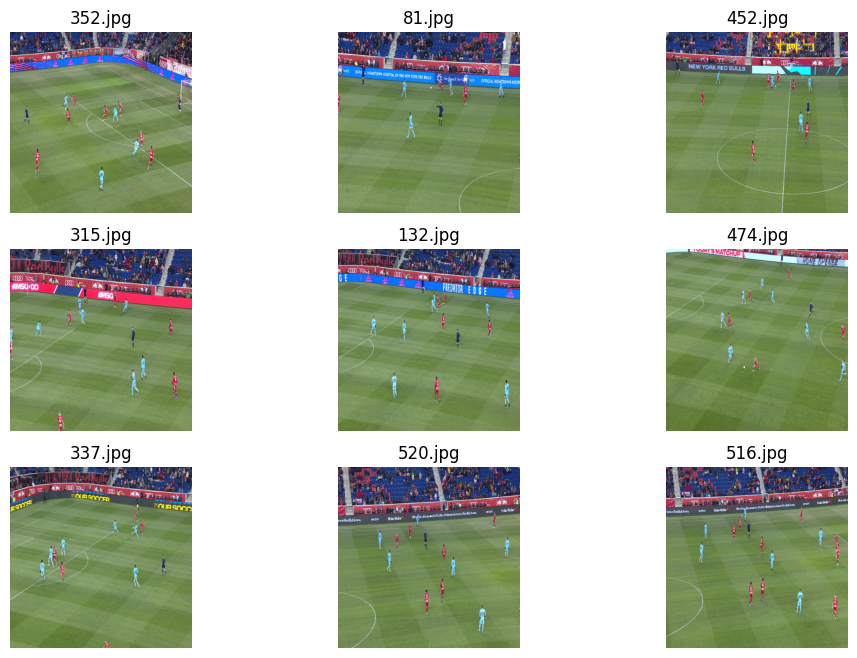

In [2]:
base_dir = '/kaggle/input/football-player-segmentation'
annote_dir = f'{base_dir}/annotations/instances_default.json'
images_dir = f'{base_dir}/images' 
image_size = 512
input_image_size = (1920, 1080)
images_listdir = os.listdir(images_dir)
print(f"{blk}Dataset contains {red}{len(images_listdir)} {blk}images")
def read_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    return img
random_images = np.random.choice(images_listdir, size = 9, replace = False)
rows = 3
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (12,8))

for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        img = read_image(f"{images_dir}/{random_images[i]}")
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

#### Data Preprocessing
Here we process the data and also show the annotations.

We have 512 images and 512 masks 
== Training set shapes == 
Images : (486, 512, 512, 3)
Masks : (486, 512, 512, 1)
== Test set shapes == 
Images : (26, 512, 512, 3)
Masks : (26, 512, 512, 1)


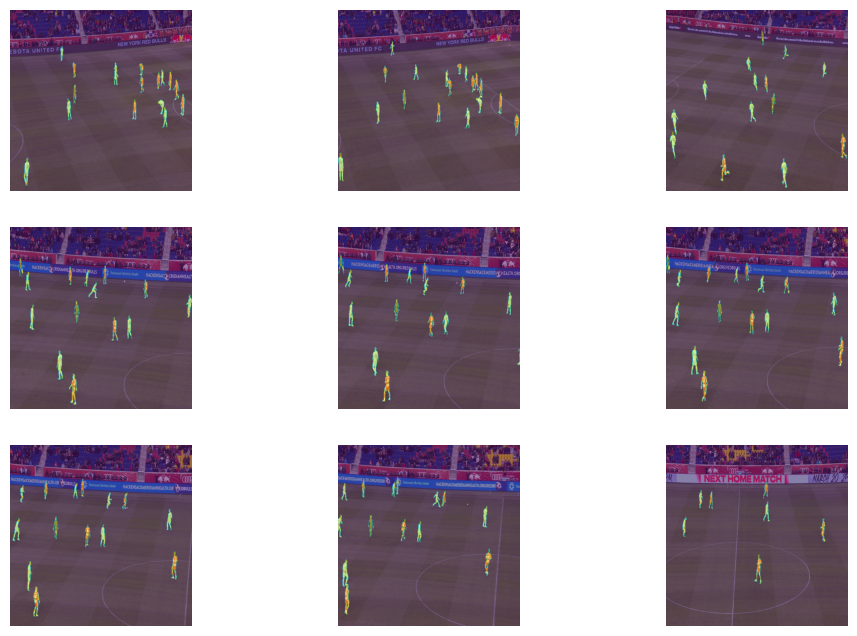

In [3]:
annote = json.load(open(annote_dir))
id_to_images = {image['id']:image['file_name'] for image in annote['images']}
images = np.zeros((len(images_listdir), image_size, image_size, 3), dtype=np.uint8)
for image_id, image_filename in id_to_images.items():
    cur_image = read_image(f"{images_dir}/{image_filename}")
    images[image_id - 1] = cur_image
masks = np.zeros((len(images_listdir), image_size, image_size, 1), dtype=bool)

for annotation in annote["annotations"]:
    image_id = annotation["image_id"]
    segmentation = annotation["segmentation"]
    cur_mask = imantics.Polygons(segmentation).mask(*input_image_size).array
    cur_mask = np.expand_dims(resize(cur_mask, (image_size, image_size), mode='constant', preserve_range=True), 2)
    mask_index = image_id - 1
    masks[mask_index] = masks[mask_index] | cur_mask
print(f"{blk}We have {red}{len(images)} {blk}images and {red}{len(masks)} {blk}masks ")
images_train, images_test, masks_train, masks_test = train_test_split(images, masks, test_size=0.05, random_state=42)
print(f"{blk}== Training set shapes == \n{blk}Images : {red}{images_train.shape}\n{blk}Masks : {red}{masks_train.shape}")
print(f"{blk}== Test set shapes == \n{blk}Images : {red}{images_test.shape}\n{blk}Masks : {red}{masks_test.shape}")
random_numbers = [random.randint(0, 511) for _ in range(9)]
fig, ax = plt.subplots(rows, cols, figsize = (12,8))
for i, ax in enumerate(ax.flat):
    if i < len(random_numbers):
        ax.imshow(images[i])
        ax.imshow(masks[i], alpha=0.5)
        ax.axis('off')

#### Model Definition

##### U-Net

In [4]:
def conv_block(input, num_filters):
#     print(input.shape)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
#     print(conv.shape)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2, 2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def Unet(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)

    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)

    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model

unet_model = Unet((512, 512, 3))
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_result = unet_model.fit(images_train, masks_train, validation_split = 0.2, batch_size = 4, epochs = 5)

Epoch 1/5


I0000 00:00:1707232861.322144     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 [==============================] - 86s 521ms/step - loss: 0.1670 - accuracy: 0.9695 - val_loss: 127.5648 - val_accuracy: 0.0377
Epoch 2/5
97/97 [==============================] - 45s 460ms/step - loss: 0.0357 - accuracy: 0.9958 - val_loss: 0.1396 - val_accuracy: 0.9895
Epoch 3/5
97/97 [==============================] - 45s 461ms/step - loss: 0.0204 - accuracy: 0.9968 - val_loss: 0.0221 - val_accuracy: 0.9961
Epoch 4/5
97/97 [==============================] - 45s 461ms/step - loss: 0.0146 - accuracy: 0.9972 - val_loss: 0.0653 - val_accuracy: 0.9839
Epoch 5/5
97/97 [==============================] - 45s 461ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.0111 - val_accuracy: 0.9972


##### U2-Net

In [5]:
def conv_block(shape, out_ch, rate=1):
    x = tf.keras.layers.Conv2D(out_ch, 3, padding="same", dilation_rate=1)(shape)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    return x

def RSU_L(shape, out_ch, M_ch, num_layers, rate=2):
    x = conv_block(shape, out_ch)
    inp_ch = x

    skip_features = []
    x = conv_block(x, M_ch)
    skip_features.append(x)

    for i in range(num_layers-2):
        x = tf.keras.layers.MaxPool2D((2, 2))(x)
        x = conv_block(x, M_ch)
        skip_features.append(x)
        
    x = conv_block(x, M_ch, rate=rate)
    skip_features.reverse()
    x = tf.keras.layers.Concatenate()([x, skip_features[0]])
    x = conv_block(x, M_ch)

    for i in range(num_layers-3):
        x = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(x)
        x = tf.keras.layers.Concatenate()([x, skip_features[i+1]])
        x = conv_block(x, M_ch)

    x = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(x)
    x = tf.keras.layers.Concatenate()([x, skip_features[-1]])
    x = conv_block(x, out_ch)

    x = tf.keras.layers.Add()([x, inp_ch])
    return x

def RSU_4F(shape, out_ch, M_ch):
    x0 = conv_block(shape, out_ch, rate=1)

    x1 = conv_block(x0, M_ch, rate=1)
    x2 = conv_block(x1, M_ch, rate=2)
    x3 = conv_block(x2, M_ch, rate=4)

    x4 = conv_block(x3, M_ch, rate=8)

    x = tf.keras.layers.Concatenate()([x4, x3])
    x = conv_block(x, M_ch, rate=4)

    x = tf.keras.layers.Concatenate()([x, x2])
    x = conv_block(x, M_ch, rate=2)

    x = tf.keras.layers.Concatenate()([x, x1])
    x = conv_block(x, out_ch, rate=1)

    x = tf.keras.layers.Add()([x, x0])
    return x

def u2net(shape, out_ch, M_ch, num_classes=1):
    inputs = tf.keras.layers.Input(shape)

    e1 = RSU_L(inputs, out_ch[0], M_ch[0], 7)
    p1 = tf.keras.layers.MaxPool2D((2, 2))(e1)

    e2 = RSU_L(p1, out_ch[1], M_ch[1], 6)
    p2 = tf.keras.layers.MaxPool2D((2, 2))(e2)

    e3 = RSU_L(p2, out_ch[2], M_ch[2], 5)
    p3 = tf.keras.layers.MaxPool2D((2, 2))(e3)

    e4 = RSU_L(p3, out_ch[3], M_ch[3], 4)
    p4 = tf.keras.layers.MaxPool2D((2, 2))(e4)

    e5 = RSU_4F(p4, out_ch[4], M_ch[4])
    p5 = tf.keras.layers.MaxPool2D((2, 2))(e5)

    b1 = RSU_4F(p5, out_ch[5], M_ch[5])
    b2 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(b1)

    d1 = tf.keras.layers.Concatenate()([b2, e5])
    d1 = RSU_4F(d1, out_ch[6], M_ch[6])
    u1 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d1)

    d2 = tf.keras.layers.Concatenate()([u1, e4])
    d2 = RSU_L(d2, out_ch[7], M_ch[7], 4)
    u2 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d2)

    d3 = tf.keras.layers.Concatenate()([u2, e3])
    d3 = RSU_L(d3, out_ch[8], M_ch[8], 5)
    u3 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d3)

    d4 = tf.keras.layers.Concatenate()([u3, e2])
    d4 = RSU_L(d4, out_ch[9], M_ch[9], 6)
    u4 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d4)

    d5 = tf.keras.layers.Concatenate()([u4, e1])
    d5 = RSU_L(d5, out_ch[10], M_ch[10], 7)

    
    y1 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d5)

    y2 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d4)
    y2 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(y2)

    y3 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d3)
    y3 = tf.keras.layers.UpSampling2D(size=(4, 4), interpolation="bilinear")(y3)

    y4 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d2)
    y4 = tf.keras.layers.UpSampling2D(size=(8, 8), interpolation="bilinear")(y4)

    y5 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d1)
    y5 = tf.keras.layers.UpSampling2D(size=(16, 16), interpolation="bilinear")(y5)

    y6 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(b1)
    y6 = tf.keras.layers.UpSampling2D(size=(32, 32), interpolation="bilinear")(y6)

    y0 = tf.keras.layers.Concatenate()([y1, y2, y3, y4, y5, y6])
    y0 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(y0)

    y0 = tf.keras.layers.Activation("sigmoid")(y0)
    y1 = tf.keras.layers.Activation("sigmoid")(y1)
    y2 = tf.keras.layers.Activation("sigmoid")(y2)
    y3 = tf.keras.layers.Activation("sigmoid")(y3)
    y4 = tf.keras.layers.Activation("sigmoid")(y4)
    y5 = tf.keras.layers.Activation("sigmoid")(y5)
    y6 = tf.keras.layers.Activation("sigmoid")(y6)

    model = tf.keras.models.Model(inputs, outputs=y0, name="U2-Net")
    return model

def build_u2net(input_shape, num_classes=1):
    out_ch = [64, 128, 256, 512, 512, 512, 512, 256, 128, 64, 64]
    M_ch = [32, 32, 64, 128, 256, 256, 256, 128, 64, 32, 16]
    model = u2net(input_shape, out_ch, M_ch, num_classes=num_classes)
    return model

def build_u2net_lite(input_shape, num_classes=1):
    out_ch = [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
    M_ch = [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
    model = u2net(input_shape, out_ch, M_ch, num_classes=num_classes)
    return model

u2net_model = build_u2net((image_size, image_size, 3))
u2net_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
u2net_result = u2net_model.fit(images_train, masks_train, validation_split = 0.2, batch_size = 4, epochs = 5)

Epoch 1/5
97/97 [==============================] - 151s 626ms/step - loss: 0.0347 - accuracy: 0.9858 - val_loss: 29.3298 - val_accuracy: 0.9809
Epoch 2/5
97/97 [==============================] - 53s 547ms/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.0197 - val_accuracy: 0.9932
Epoch 3/5
97/97 [==============================] - 53s 547ms/step - loss: 0.0064 - accuracy: 0.9975 - val_loss: 0.0098 - val_accuracy: 0.9964
Epoch 4/5
97/97 [==============================] - 53s 547ms/step - loss: 0.0058 - accuracy: 0.9977 - val_loss: 0.0070 - val_accuracy: 0.9973
Epoch 5/5
97/97 [==============================] - 53s 547ms/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.0059 - val_accuracy: 0.9977


#### Test the Models

In [ ]:
unet_predict = unet_model.predict(images_test)
unet_predict = (unet_predict > 0.5).astype(np.uint8)
u2net_predict = u2net_model.predict(images_test)
u2net_predict = (u2net_predict > 0.5).astype(np.uint8)
def show_result(og, unet, u2net, target):
    fig, axs = plt.subplots(1, 4, figsize=(10,5))
    axs[0].set_title("Original")
    axs[0].imshow(og)
    axs[0].axis('off')
    
    axs[1].set_title("U-Net")
    axs[1].imshow(unet)
    axs[1].axis('off')
    
    axs[2].set_title("U2-Net")
    axs[2].imshow(u2net)
    axs[2].axis('off')
    
    axs[3].set_title("Ground Truth")
    axs[3].imshow(target)
    axs[3].axis('off')

    plt.show()

In [ ]:
show_test_idx = random.sample(range(26), 3)
for idx in show_test_idx: 
    show_result(images_test[idx], unet_predict[idx], u2net_predict[idx], masks_test[idx])

## Project 3: Segment Anything
https://www.kaggle.com/code/mjmaher987/segment-anything-model-how-to/edit

https://arxiv.org/pdf/2304.02643.pdf

### Install Requirements

In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-wk14zjc9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-wk14zjc9
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import torchvision
from PIL import Image
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

### Data Gathering

In [ ]:
cd ..

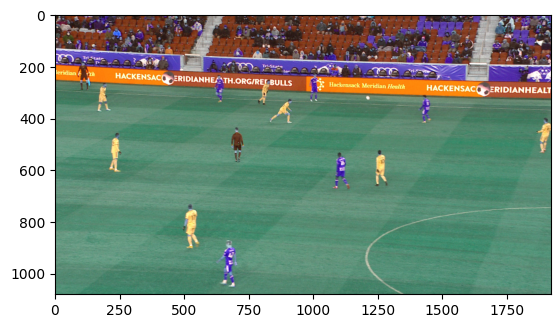

In [3]:
def show_mask(mask, ax):
    color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
checkpoint_path='/kaggle/input/segment-anything-models/sam_vit_h_4b8939.pth'
img=cv2.imread('/kaggle/input/football-player-segmentation/images/100.jpg')
plt.imshow(img)

### Model Definition

In [4]:
sam = sam_model_registry["default"](checkpoint=checkpoint_path)
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sam.to(device)
mask_generator = SamAutomaticMaskGenerator(sam)

### Testing

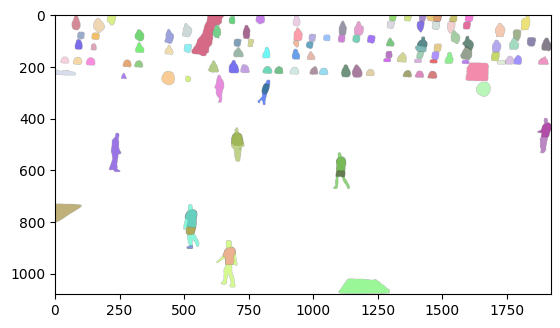

In [5]:
masks = mask_generator.generate(img)
for mask in masks:
    if mask['area']<10_000:
        show_mask(mask['segmentation'], plt.gca())